In [1]:
from importlib import reload
import cupid_reader
reload(cupid_reader)
from cupid_reader import *

/home/anna/anaconda3/envs/conda3_env/lib/python3.6/site-packages/matplotlib/__init__.py:841: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/anna/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


In [2]:
profiles = read_pickle('cleaned_profiles.p')[:]

#### Stem and remove punctuation (takes a while)

In [3]:
essays = []
for i in range(0,10):
    essays.append(essay(profiles, essay_num=i, frac_training=0.8))
    essays[i].stem_and_remove_punctuation(stemmer=SnowballStemmer("english") )

Removed punctuation, tokenized, and stemmed responses for essay  0
Time Elapsed: 203.62s
Removed punctuation, tokenized, and stemmed responses for essay  1
Time Elapsed: 78.47s
Removed punctuation, tokenized, and stemmed responses for essay  2
Time Elapsed: 54.14s
Removed punctuation, tokenized, and stemmed responses for essay  3
Time Elapsed: 31.26s
Removed punctuation, tokenized, and stemmed responses for essay  4
Time Elapsed: 178.69s
Removed punctuation, tokenized, and stemmed responses for essay  5
Time Elapsed: 54.20s
Removed punctuation, tokenized, and stemmed responses for essay  6
Time Elapsed: 42.12s
Removed punctuation, tokenized, and stemmed responses for essay  7
Time Elapsed: 34.46s
Removed punctuation, tokenized, and stemmed responses for essay  8
Time Elapsed: 29.72s
Removed punctuation, tokenized, and stemmed responses for essay  9
Time Elapsed: 52.66s


#### Covert prediction text labels to numeric, then split prediction set (gender in this case) into training and test subsets

In [4]:
# create numeric ids, training/test subsets for the prediction column
gender_prediction = prediction(profiles, 'sex', frac_training=0.8)
religion_prediction = prediction(profiles, 'religion', frac_training=0.8)


In [5]:
#check matching numeric to text category labels
for i, id in enumerate(gender_prediction.id_pairs):
    print(id)

(0, 'f')
(1, 'm')


In [6]:
gender_prediction.id_pairs

[(0, 'f'), (1, 'm')]

#### Split responses into training/test, convert to vector representation, apply TDFIF transform (weighting words according to frequency of appearance in each corpus and inverse frequency of # documents) and fit to training data and then apply transform to data

In [7]:
# split into training and test sets
for essay in essays:
    essay.train_test_split(frac_training=0.8)
    essay.fit_with_bestMinDF(gender_prediction, 'gender', ngram_max=2, minDF_range=[0.001], maxDF=0.9)
    
# vectorize, transform, use logistic regression and find best min_DF value
# save model and y scores for best min_df

#essay0.fit_with_bestMinDF(gender_prediction, 'gender', ngram_max=2, minDF_range=np.linspace(5e-4, 5e-2, 10), maxDF=0.9)
#essay4.fit_with_bestMinDF(gender_prediction, 'gender', ngram_max=2, minDF_range=np.linspace(5e-4, 5e-2, 10), maxDF=0.6)

# fixing min_df for now--has big effect on top ranked features

#essay0.fit_with_bestMinDF(gender_prediction, 'gender', ngram_max=1, minDF_range=[0.005], maxDF=0.9)
#essay4.fit_with_bestMinDF(gender_prediction, 'gender', ngram_max=2, minDF_range=[0.005], maxDF=0.9)

Best min_df:  0.001
Time Elapsed: 55.82s
Best min_df:  0.001
Time Elapsed: 27.87s
Best min_df:  0.001
Time Elapsed: 16.53s
Best min_df:  0.001
Time Elapsed: 11.01s
Best min_df:  0.001
Time Elapsed: 84.44s
Best min_df:  0.001
Time Elapsed: 14.74s
Best min_df:  0.001
Time Elapsed: 14.49s
Best min_df:  0.001
Time Elapsed: 13.54s
Best min_df:  0.001
Time Elapsed: 10.44s
Best min_df:  0.001
Time Elapsed: 18.08s


In [8]:
wordsSets=[]

for essay in essays:
    wordsSets.append(essay.get_top_features('gender', gender_prediction, Ntop_features=60, printOutput=False))


#### ROC curves for the models

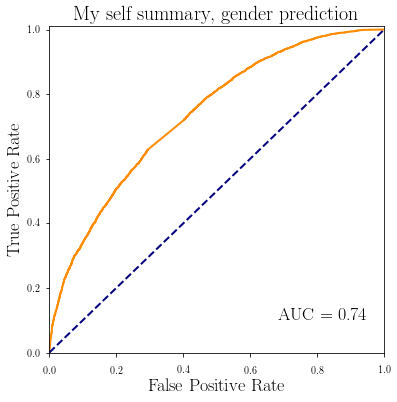

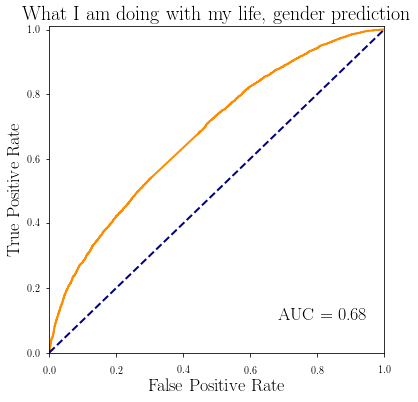

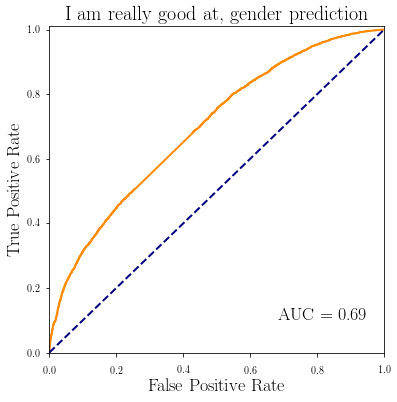

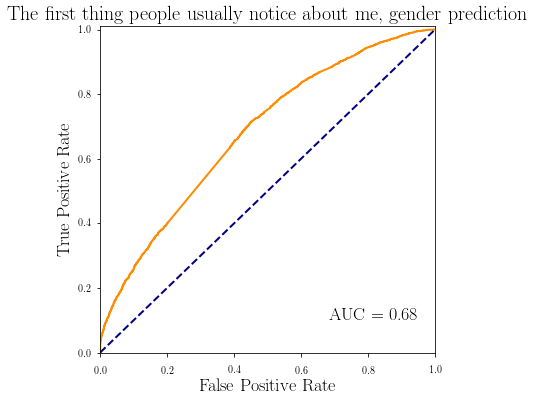

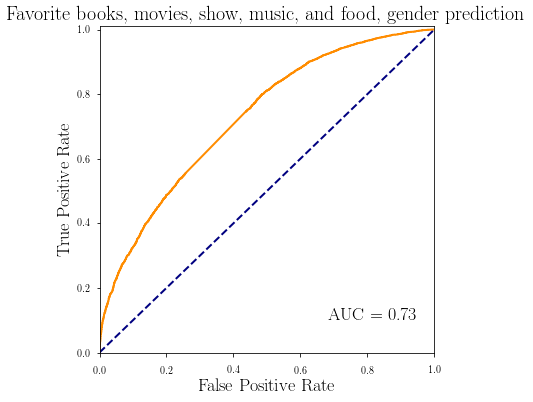

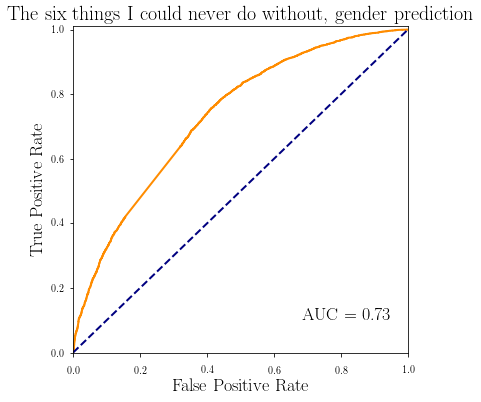

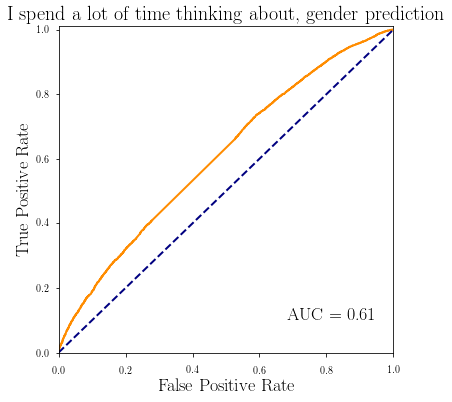

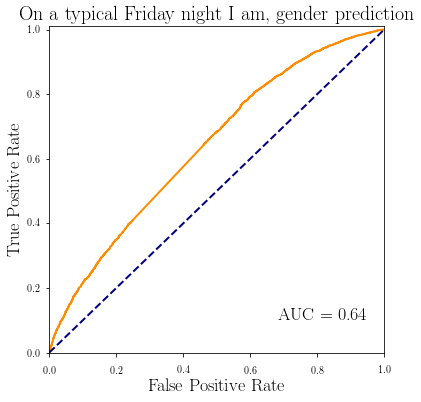

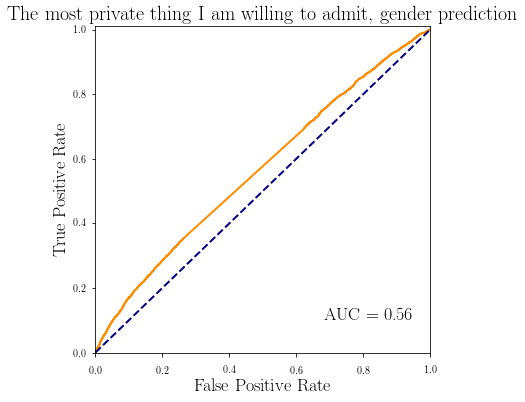

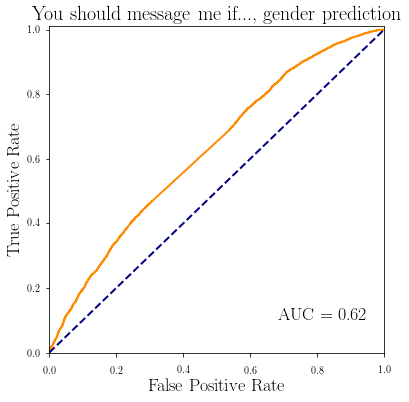

In [9]:
for essay in essays:
    essay.plotROC('gender', gender_prediction)


In [10]:
precisions=[]
for essay in essays:
    precisions.append(essay.make_prediction('gender', gender_prediction, threshold=0.5, printOutput=True))

My self summary: 
Precision aka TP/(TP+FP) =  0.6576018214014673

What I am doing with my life: 
Precision aka TP/(TP+FP) =  0.6121225828338799

I am really good at: 
Precision aka TP/(TP+FP) =  0.6152985909192574

The first thing people usually notice about me: 
Precision aka TP/(TP+FP) =  0.61333778668448

Favorite books, movies, show, music, and food: 
Precision aka TP/(TP+FP) =  0.6569767441860465

The six things I could never do without: 
Precision aka TP/(TP+FP) =  0.6543684653286864

I spend a lot of time thinking about: 
Precision aka TP/(TP+FP) =  0.572824427480916

On a typical Friday night I am: 
Precision aka TP/(TP+FP) =  0.5916929547844374

The most private thing I am willing to admit: 
Precision aka TP/(TP+FP) =  0.5509783728115345

You should message me if...: 
Precision aka TP/(TP+FP) =  0.5875272387672512



#### Make word clouds 

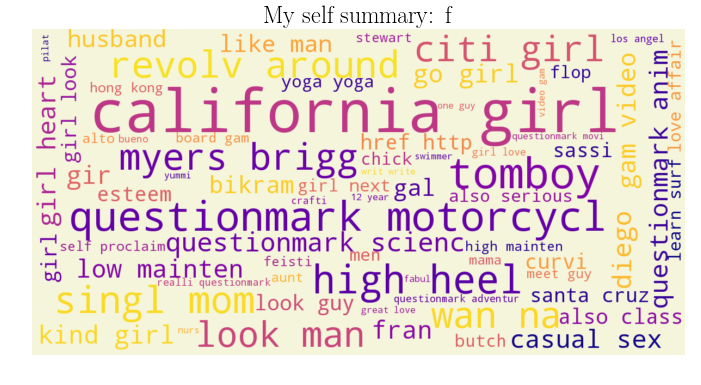

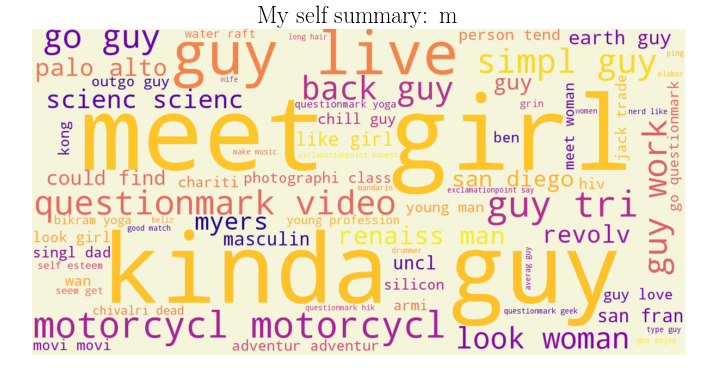

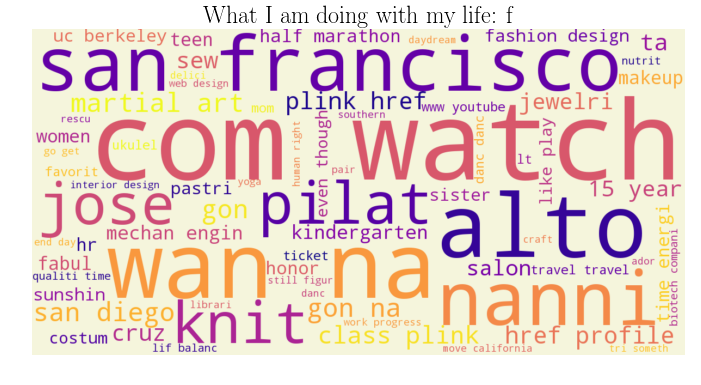

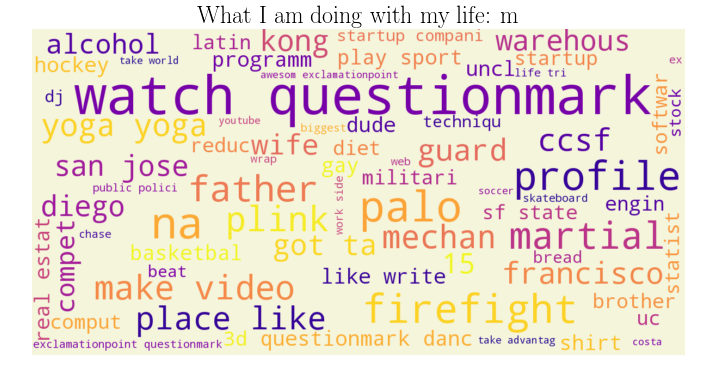

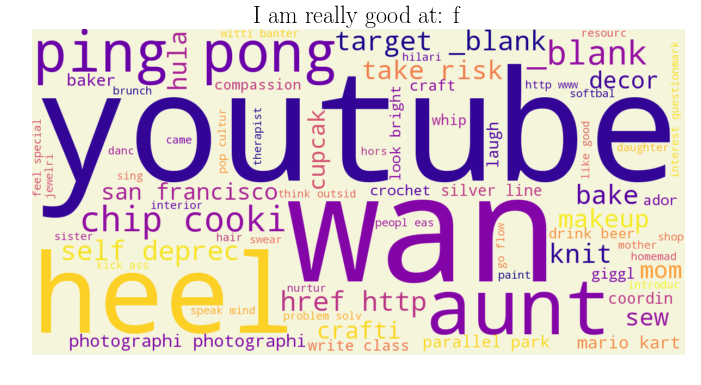

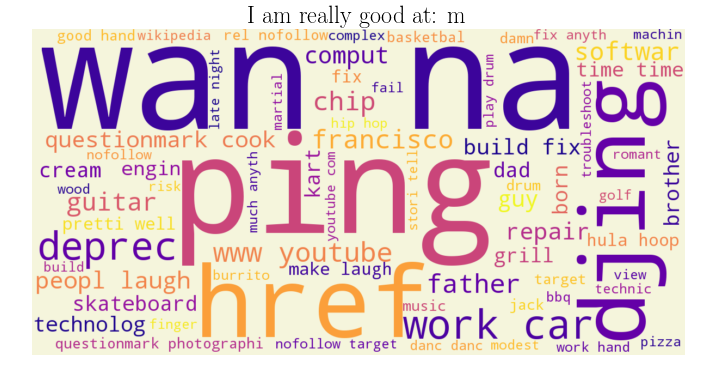

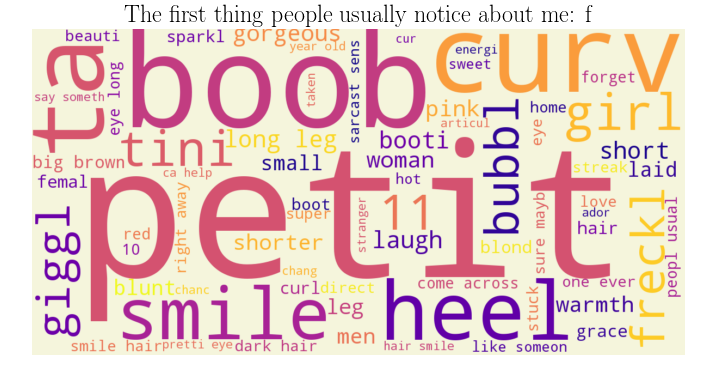

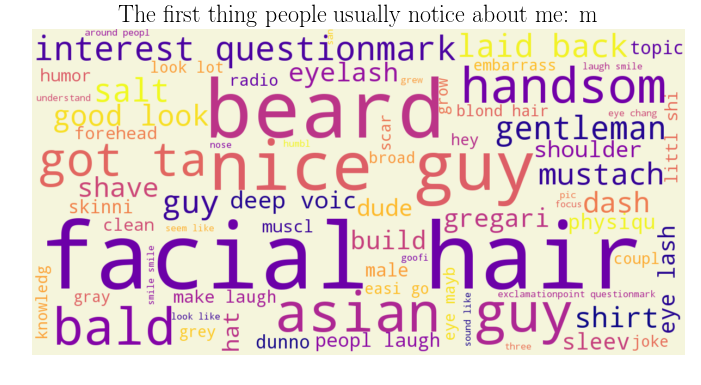

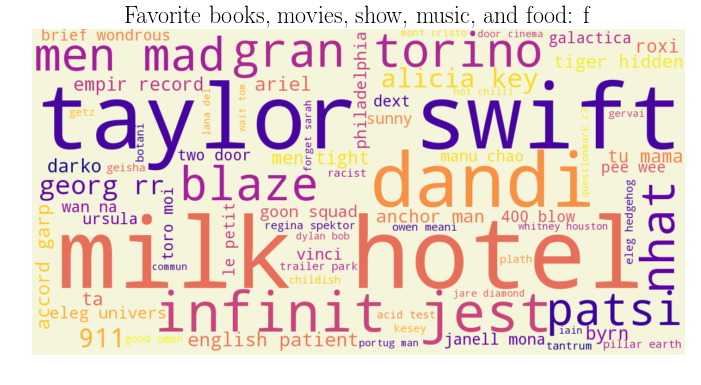

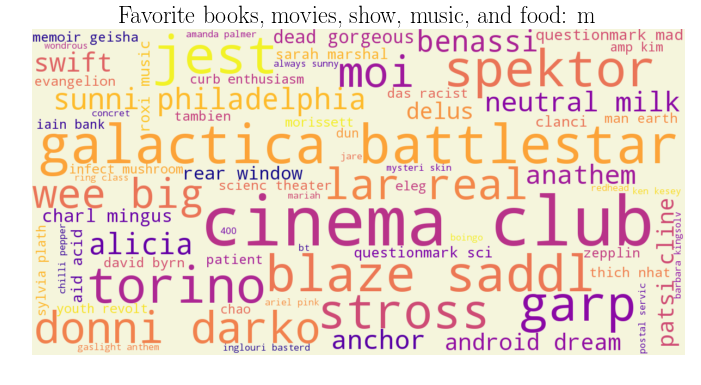

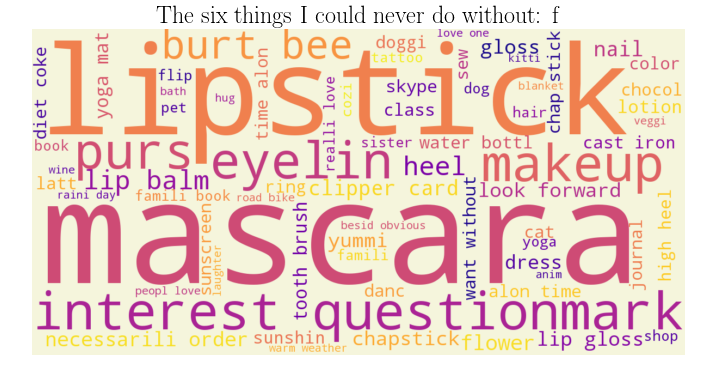

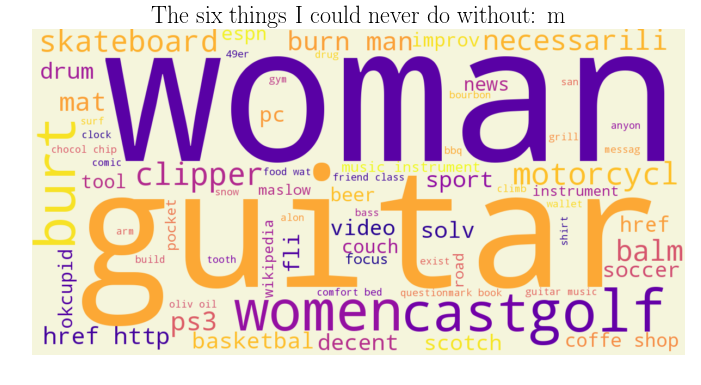

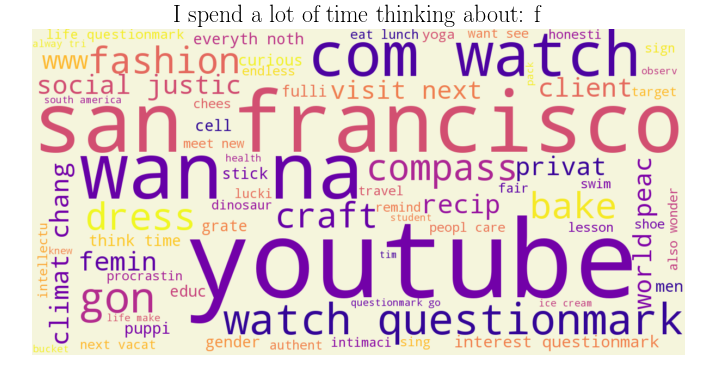

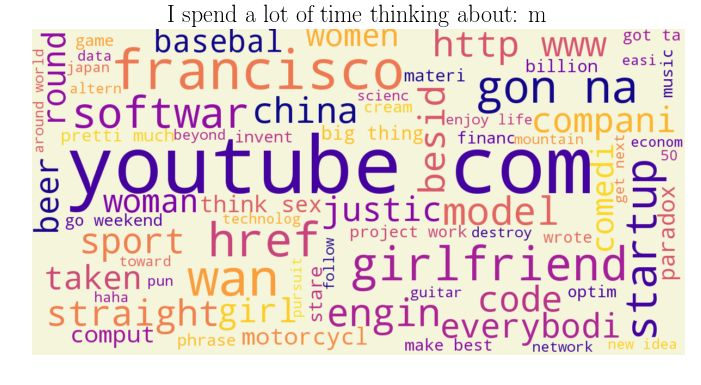

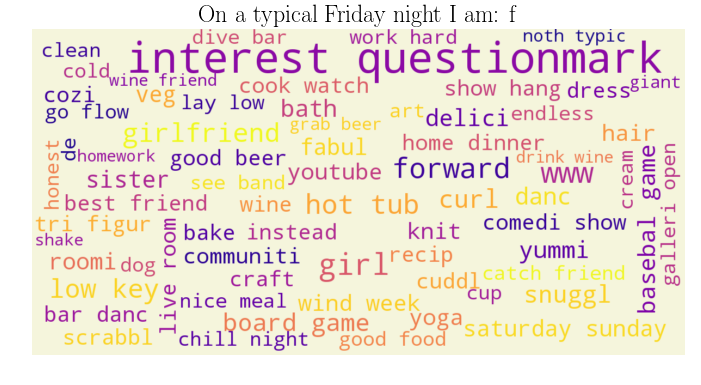

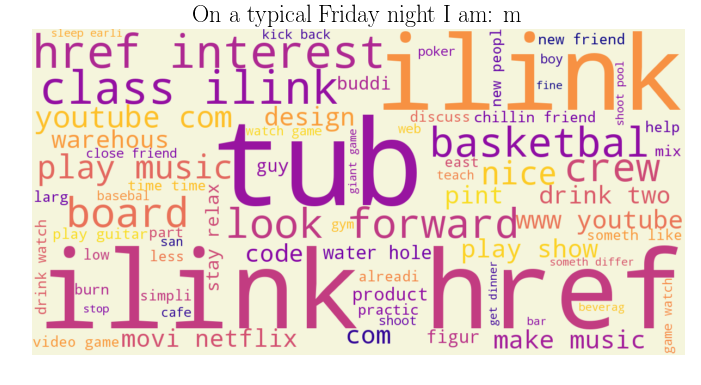

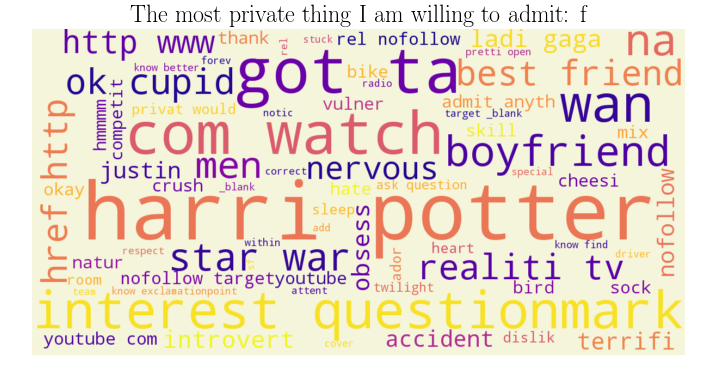

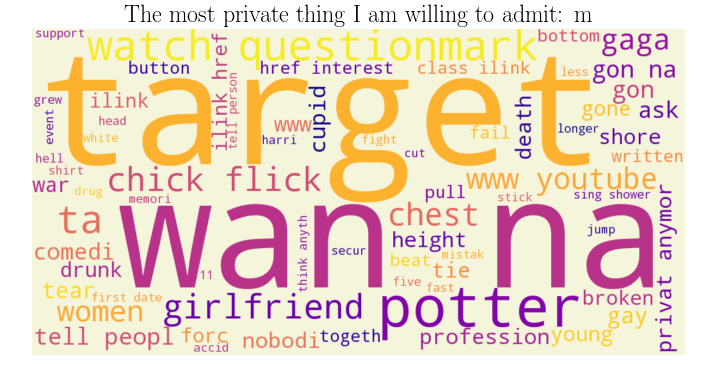

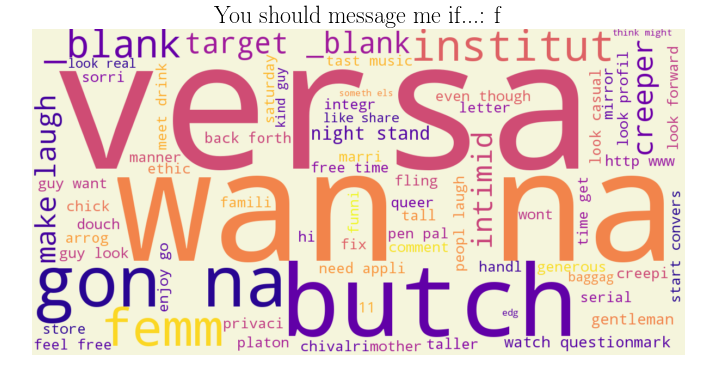

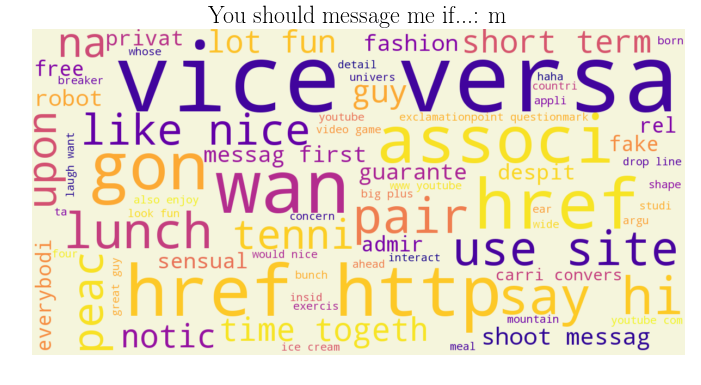

In [11]:
for essay in essays:
    essay.make_wordcloud('gender', gender_prediction, Ntop_features=70, bg_color='beige', cmap="plasma", maxFont=None)

In [15]:
essays[0].show_extremes(profiles, 'gender', gender_prediction, threshold=0.5)

My self summary
gender prediction:  m  (correct)
Highest y score for correct predictions:  0.999998861767 , index= 55258
Response:  my name is tristan (<a href="http://www.okcupid.com/profile?u=loupiote" rel="nofollow" target="_blank">loupiote</a> on okcupid). i grew up in <a class="ilink" href= "/interests?i=paris">paris</a> and moved to san francisco more than 10 years ago. i am a software engineer by formation (now doing that part-time freelance), but i think my biggest passion is <a class= "ilink" href="/interests?i=photography">photography</a>, and you can see a lot of my recent work at <a href="http://www.loupiote.com" rel="nofollow" target="_blank">www.loupiote.com</a>.  i'm often on-line and you can chat with me on im. i prefer using google-talk. here is where you can find me on the web:  <a href="http://loupiote.com/index2.html"><b>loupiote.com</b></a> - <a href="http://loupiote.tumblr.com/"><b>tumblr.com</b></a> - <a href="http://people.tribe.net/loupiote"><b>tribe.net</b></a

#### Testing multiclass predictions

In [ ]:
# don't fit for best minDF for multiclass orientation prediction--hard to classify when most are in one category (straight) and much less in others (gay/bi)?
essay0.train_test_split(frac_training=0.8)
vectorizer = essay0.vectorizer_init(ngram_max=3, min_df=0.0005, max_df=0.9)
essay0.transformer_init()
train_tfidf, test_tfidf = essay0.bagWords_and_transform(vectorizer, showTime=True)
mdl, yScore = essay0.logRegression(religion_prediction, train_tfidf, test_tfidf)

In [ ]:
essay0.add_prediction('religion', mdl, vectorizer, train_tfidf, test_tfidf)
features_stem = vectorizer.get_feature_names()
zipped_coef_features = list( zip(mdl.coef_[cat_idx], features_stem),  )
zipped_coef_features.sort()